In [1]:
import igraph
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.patches as mpatches
import hoggorm as hm.
import os
os.chdir("../src")
from build_network_object import build_network_object
from draw_network_by_classification import draw_network_by_classification, compare_degrees_strength
from draw_adjacency_matrix import draw_adjacency_matrix, draw_adjacency_matrix_nolabel
from draw_and_print_communities import draw_and_print_communities, compare_comunity_intersection
from correlations import correlation_industry_pairs, correlation_network_degree,correlation_adjacency_matrix
import seaborn as sns

# Comparison between Flows and Connection algorithms for 1997-2008 matrices 

## Flows


In [2]:
label1 = "Table1_Reduced_matrix_1997_2008_flows"
reduced_matrix_1997_2008 = pd.read_csv("../data/"+label1+".csv", index_col=0)

reduced_matrix_1997_2008_flows = reduced_matrix_1997_2008[reduced_matrix_1997_2008['StartIndst']!=0]

sub_matrix_1997_2008_less1 = reduced_matrix_1997_2008_flows[reduced_matrix_1997_2008_flows['weight']<1].sort_values(by=['weight'], ascending=False)
sub_matrix_1997_2008_flows = sub_matrix_1997_2008_less1[sub_matrix_1997_2008_less1['weight']>0].sort_values(by=['weight'], ascending=False)

print ("Number of links:", sub_matrix_1997_2008_flows.shape[0]/2)
print ("Number of 4-digit industries observed:")
print (len(np.unique([sub_matrix_1997_2008_flows['StartIndst'].values,sub_matrix_1997_2008_flows['FinalIndst'].values])))
sub_matrix_1997_2008_flows[1:50]

Number of links: 1146.0
Number of 4-digit industries observed:
367


StartIndst  FinalIndst    weight  \
4816        5161        5181  0.999590   
4817        4021        4022  0.999557   
4787        5162        5182  0.999342   
4681        5271        5274  0.999221   
4711        5274        5271  0.999142   
4596        4022        4021  0.999139   
4634        5182        5162  0.998928   
4678        4011        4012  0.998864   
4784        5166        5188  0.998777   
4734        7483        7485  0.998493   
3669        2943        2940  0.998049   
3670        2942        2940  0.998049   
3671        2941        2940  0.998049   
4338        5188        5166  0.998039   
4558        2754        2753  0.997991   
4653        2822        2622  0.997672   
4814        2940        2943  0.997610   
4818        2940        2941  0.997610   
4815        2940        2942  0.997610   
4771        1421        1412  0.997574   
4509        2753        2754  0.997528   
4586        5523        5522  0.997467   
3382        9003        9000  0.997352   
4398        2611        2612  0.997300   
4755        1421        1411  0.997197   
4429        7485        7483  0.997180   
4482        2622        2822  0.996751   
4235        1543        1589  0.996599   
4819        9000        9003  0.996481   
4141        2951        3001  0.996065   
4313        5522        5523  0.996000   
4718        3001        5185  0.995967   
4237        1724        1754  0.995911   
4685        1754        1724  0.995911   
4155        1412        1421  0.995903   
4666        2612        2611  0.995892   
4657        4012        4011  0.995848   
4790        1589        1543  0.995657   
4154        1411        1421  0.995480   
4803        4100        4200  0.995100   
2819        4200        4100  0.995063   
4705        3001        2951  0.994791   
4775         130         123  0.994406   
4594        4020        4021  0.994364   
4406        7250        7210  0.994077   
4461        2466        2413  0.993814   
4573        5170        5190  0.993473   
3559         123         130  0.993380   
4511        2224        2225  0.993305   

                                 SubActivity_StartIndst  \
4816                                                NaN   
4817                                 Manufacture of gas   
4787                                                NaN   
4681  Repair of boots, shoes and other articles of l...   
4711                                      Repair n.e.c.   
4596  Distribution and trade of gaseous fuels throug...   
4634  Wholesale of mining, construction and civil en...   
4678                          Production of electricity   
4784                                                NaN   
4734                                                NaN   
3669          Manufacture of other machine tools n.e.c.   
3670    Manufacture of other metalworking machine tools   
3671      Manufacture of portable hand held power tools   
4338  Wholesale of agricultural machinery and access...   
4558                Casting of other non-ferrous metals   
4653  Manufacture of central heating radiators and b...   
4814                                                NaN   
4818                                                NaN   
4815                                                NaN   
4771                  Operation of gravel and sand pits   
4509                            Casting of light metals   
4586  Holiday centres and holiday villages, Other se...   
3382     Sanitation, remediation and similar activities   
4398                          Manufacture of flat glass   
4755                  Operation of gravel and sand pits   
4429             Secretarial and translation activities   
4482           Manufacture of ceramic sanitary fixtures   
4235   Manufacture of margarine and similar edible fats   
4819                                                NaN   
4141            Manufacture of machinery for metallurgy   
4313             Camping sites, including caravan sites   
4718             

## Connections


In [3]:
label2 = "Table2_Reduced_matrix_1997_2008_connections"
reduced_matrix_1997_2008_conn = pd.read_csv("../data/"+label2+".csv", index_col=0)

reduced_matrix_1997_2008_conn = reduced_matrix_1997_2008_conn[reduced_matrix_1997_2008_conn['StartIndst']!=0]


sub_matrix_1997_2008_conn_less1 = reduced_matrix_1997_2008_conn[reduced_matrix_1997_2008_conn['weight']<1]
sub_matrix_1997_2008_conn = sub_matrix_1997_2008_conn_less1[sub_matrix_1997_2008_conn_less1['weight']>0]

print ("Number of links:", sub_matrix_1997_2008_conn.shape[0]/2)
print ("Number of 4-digit industries observed:")
print (len(np.unique([sub_matrix_1997_2008_conn['StartIndst'].values,sub_matrix_1997_2008_conn['FinalIndst'].values])))

sub_matrix_1997_2008_conn.sort_values(by=['weight'], ascending=False)[1:50]



Number of links: 1989.0
Number of 4-digit industries observed:
429


StartIndst  FinalIndst    weight  \
6813         501         502  0.999752   
6800        5274        5271  0.999636   
6747        5271        5274  0.999636   
6932        5161        5181  0.999543   
6648        5181        5161  0.999543   
6802        1721        1723  0.999432   
6722        1723        1721  0.999432   
6299        2111        2122  0.999332   
6919        2122        2111  0.999332   
6849        5162        5182  0.999301   
6685        5182        5162  0.999301   
6844        1724        1725  0.999246   
6745        1725        1724  0.999246   
6940        4021        4022  0.999228   
6293        4022        4021  0.999228   
6559        2754        2753  0.998969   
6528        2753        2754  0.998969   
6656        1712        1713  0.998937   
6677        1713        1712  0.998937   
6857        5166        5188  0.998882   
6225        5188        5166  0.998882   
6514        2622        2822  0.998874   
6659        2822        2622  0.998874   
6067        7123        6220  0.998852   
6911        6220        7123  0.998852   
6354        2611        2612  0.998382   
6709        2612        2611  0.998382   
6902        2661        2666  0.998205   
5833        2666        2661  0.998205   
6552        5157        3710  0.998120   
6490        3710        5157  0.998120   
6827        7483        7485  0.998108   
6407        7485        7483  0.998108   
6939        2940        2941  0.998092   
5128        2941        2940  0.998092   
6853        2663        1411  0.998089   
6594        1411        2663  0.998089   
6084        2721        2751  0.998080   
6736        2751        2721  0.998080   
6697        4012        4011  0.997945   
6764        4011        4012  0.997945   
6831        3001        2951  0.997919   
5894        2951        3001  0.997919   
6315        5137        5227  0.997823   
6833        5227        5137  0.997823   
5126        2943        2940  0.997799   
6927        2940        2943  0.997799   
6743        1754        1724  0.997775   
6090        1724        1754  0.997775   

                                 SubActivity_StartIndst  \
6813                                                NaN   
6800                                      Repair n.e.c.   
6747  Repair of boots, shoes and other articles of l...   
6932                                                NaN   
6648                         Wholesale of machine tools   
6802                                Cotton-type weaving   
6722                               Worsted-type weaving   
6299                                Manufacture of pulp   
6919  Manufacture of household and sanitary goods an...   
6849                                                NaN   
6685  Wholesale of mining, construction and civil en...   
6844                                  Silk-type weaving   
6745                              Other textile weaving   
6940                                 Manufacture of gas   
6293  Distribution and trade of gaseous fuels throug...   
6559                Casting of other non-ferrous metals   
6528                            Casting of light metals   
6656    Preparation and spinning of woollen-type fibres   
6677    Preparation and spinning of worsted-type fibres   
6857                                                NaN   
6225  Wholesale of agricultural machinery and access...   
6514           Manufacture of ceramic sanitary fixtures   
6659  Manufacture of central heating radiators and b...   
6067  Renting of passenger air transport equipment,R...   
6911                  Other non-scheduled air transport   
6354                          Manufacture of flat glass   
6709               Shaping and processing of flat glass   
6902  Manufacture of concrete products for construct...   
5833  Manufacture of other articles of concrete, pla...   
6552                       Wholesale of waste and scrap   
6490                 Recycling of metal waste and scrap   
6827             

/Users/crangelsmith/PycharmProjects/KnowledgeFlows/python/labour_flows_matrix/src/correlations.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  df_industry1['id'] = df_industry1.groupby(['StartIndst', 'FinalIndst']).ngroup()
/usr/local/anaconda3/envs/kflows/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


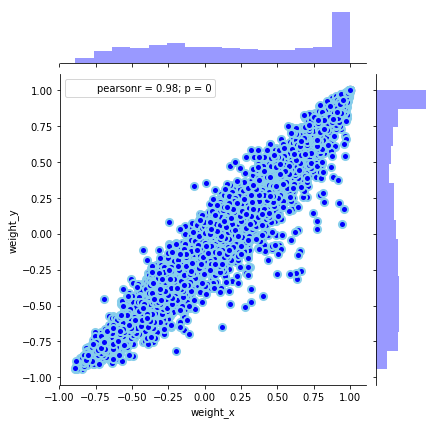

/usr/local/anaconda3/envs/kflows/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


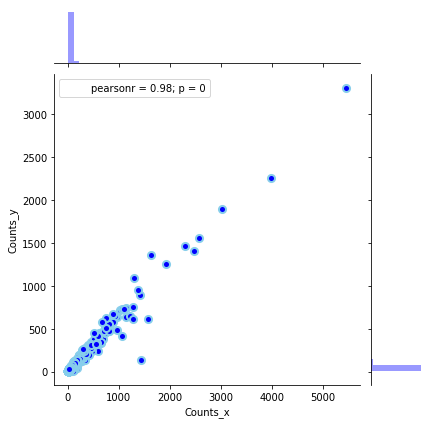

In [4]:
correlation_industry_pairs(sub_matrix_1997_2008_conn_less1,sub_matrix_1997_2008_less1)


correlation_industry_pairs(sub_matrix_1997_2008_conn_less1,sub_matrix_1997_2008_less1,'counts')


/usr/local/anaconda3/envs/kflows/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


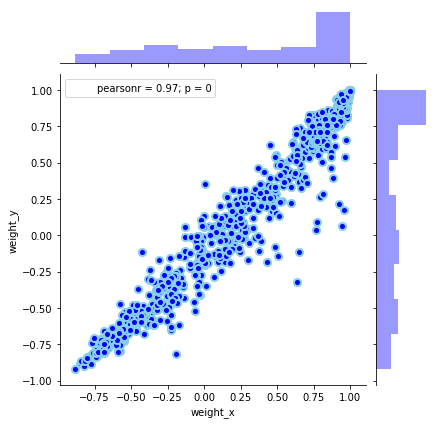

/usr/local/anaconda3/envs/kflows/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


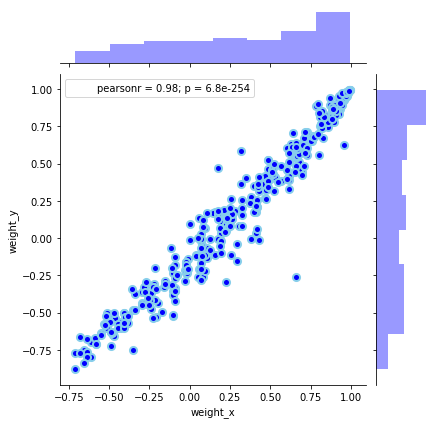

In [5]:
correlation_industry_pairs(sub_matrix_1997_2008_conn_less1[sub_matrix_1997_2008_conn_less1['Counts']<11],sub_matrix_1997_2008_less1,'weight')


correlation_industry_pairs(sub_matrix_1997_2008_conn_less1[sub_matrix_1997_2008_conn_less1['Counts']>100],sub_matrix_1997_2008_less1,'weight')


In [6]:
Gm_simple_1997_2008_flows = build_network_object(reduced_matrix_1997_2008_flows,'weight')
Gm_simple_1997_2008_conn = build_network_object(reduced_matrix_1997_2008_conn,'weight')

## Degree comparison:

NETWORK OF flows


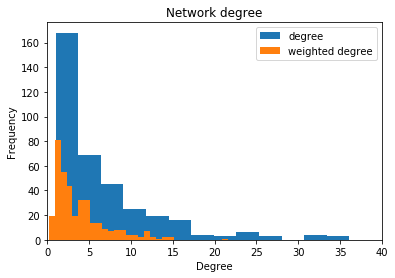

mean degree 6.746594005449591
mean strenght 3.7859163346274283


NETWORK OF connections


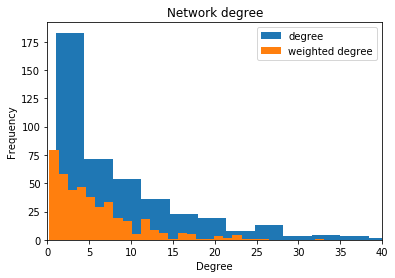

mean degree 9.272727272727273
mean strenght 5.7022668743343


In [7]:
print ('NETWORK OF flows')
compare_degrees_strength(Gm_simple_1997_2008_flows)
print()
print()
print ('NETWORK OF connections')
compare_degrees_strength(Gm_simple_1997_2008_conn)

/usr/local/anaconda3/envs/kflows/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


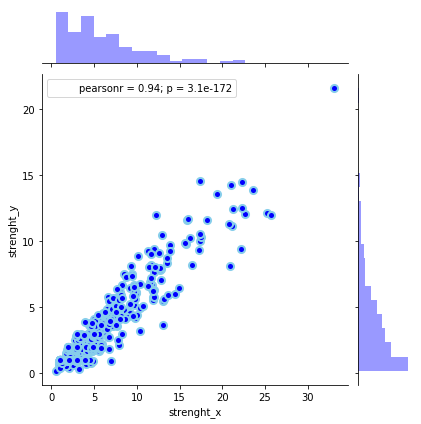

/usr/local/anaconda3/envs/kflows/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


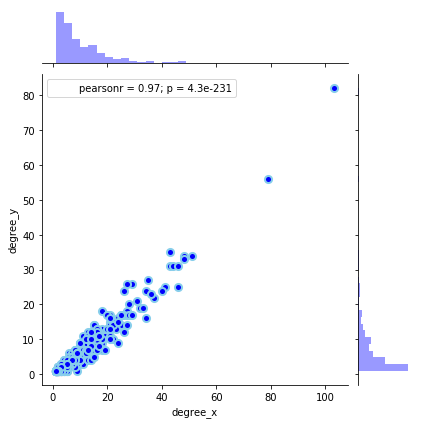

In [8]:
correlation_network_degree(Gm_simple_1997_2008_conn,Gm_simple_1997_2008_flows,'strength')
correlation_network_degree(Gm_simple_1997_2008_conn,Gm_simple_1997_2008_flows,'degree')


## Adjacency matrix:
### Flows:

In [9]:
draw_adjacency_matrix_nolabel(reduced_matrix_1997_2008_flows,['StartIndst','FinalIndst'],'weight')

### Connections:

In [10]:
draw_adjacency_matrix_nolabel(reduced_matrix_1997_2008_conn,['StartIndst','FinalIndst'],'weight')

/usr/local/anaconda3/envs/kflows/lib/python3.7/site-packages/seaborn/axisgrid.py:1847: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


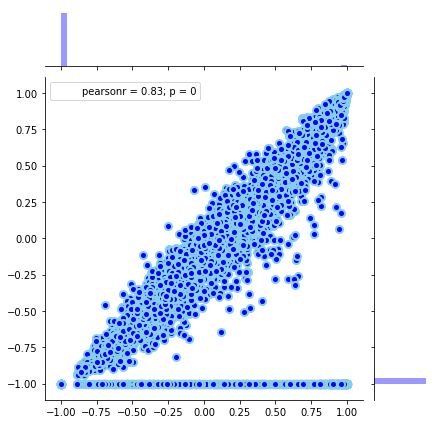

adjacency matrix correlation
(0.8278828020900044, 0.0)
percentage of the entries with non-symetrical missigness
0.8586731657550939


In [11]:
correlation_adjacency_matrix(reduced_matrix_1997_2008_conn,reduced_matrix_1997_2008_flows,'weight')

## Network visualisation: by community
## Flows:

In [13]:
network_components_1997_2008_flows = Gm_simple_1997_2008_flows.components()
network_largest_1997_2008_flows = network_components_1997_2008_flows.subgraphs()[0]


In [14]:
net_community_1997_2008_flows = network_largest_1997_2008_flows.community_multilevel(weights=network_largest_1997_2008_flows.es['weight'])
print ('Modularity',net_community_1997_2008_flows.modularity)

Modularity 0.6031942584029139


In [15]:
list_communities_flows = draw_and_print_communities(network_largest_1997_2008_flows,net_community_1997_2008_flows,'../img/'+label1+'/network_community.png','subactivity')

Community : 1
['Activities of households as employers of domestic staff'
 'Activities of political organizations'
 'Activities of religious organizations' 'Building and repairing of ships'
 'Canteens'
 'Charitable social work activities with accommodation, Non-charitable social work activities with accommodation'
 'Charitable social work activities without accommodation,Non-charitable social work activities without accommodation'
 'Compulsory social security activities' 'Defence activities'
 'Dental practice activities' 'Development and selling of real estate'
 'Driving school activities' 'Fire service activities' 'Foreign affairs'
 'General (overall) public service activities'
 'General secondary education' 'Justice and judicial activities'
 'Management of real estate on a fee or contract basis'
 'Medical practice activities'
 'Museums activities,Preservation of historical sites and buildings'
 'National post activities'
 'Other adult and other education n.e.c., Activities of private 

## Connections:



In [16]:
network_components_1997_2008_conn = Gm_simple_1997_2008_conn.components()
network_largest_1997_2008_conn = network_components_1997_2008_conn.subgraphs()[0]
net_community_1997_2008_conn = network_largest_1997_2008_conn.community_multilevel(weights=network_largest_1997_2008_conn.es['weight'])
print ('Modularity',net_community_1997_2008_conn.modularity)

Modularity 0.549844097099738


In [17]:
list_communities_conn = draw_and_print_communities(network_largest_1997_2008_conn,net_community_1997_2008_conn,'../img/'+label2+'/network_community.png','subactivity')

Community : 1
[' Activities of bank holding companies Financial intermediation not elsewhere classified, Activities of investment trusts,unit trusts, venture and development capital companies,open-ended investment companies,property unit trusts, Security dealing on own account'
 'Accounting and auditing activities,Book-keeping activities,Tax consultancy'
 'Activities auxiliary to financial intermediation n.e.c.'
 'Activities auxiliary to insurance and pension funding'
 "Activities of business and employers' organizations"
 'Activities of households as employers of domestic staff'
 'Activities of other membership organizations n.e.c.'
 'Activities of political organizations'
 'Activities of professional organizations'
 'Activities of religious organizations' 'Activities of trade unions'
 'Administration of financial markets'
 'Architectural,Urban planning and landscape architectural activities, Engineering design activities for industrial process and production, Engineering related scie

### Flows:

!['something here'](../img/Table1_Reduced_matrix_1997_2008_flows/network_community.png)


### Connections:


![title](../img/Table2_Reduced_matrix_1997_2008_connections/network_community.png)


In [18]:
print (list_communities_conn[1])
print (list_communities_flows[0])

['Collection and treatment of other waste'
 'Collection and treatment of sewage'
 'Collection, purification and distribution of water'
 'Construction of commercial buildings, Construction of domestic buildings, Construction of civil engineering constructions'
 'Construction of motorways, roads, airfields and sport facilities'
 'Construction of water projects'
 'Deep coal mines Open cast coal working, Manufacture of solid fuel'
 'Demolition and wrecking of buildings; earth moving'
 'Distribution and trade of electricity'
 'Erection of roof covering and frames' 'Insulation work activities'
 'Joinery installation' 'Manufacture of agricultural tractors'
 'Manufacture of central heating radiators and boilers'
 'Manufacture of ceramic sanitary fixtures'
 'Manufacture of steam generators, except central heating hot water boilers'
 'Other building completion'
 'Other construction work involving special trades'
 'Other mining and quarrying n.e.c.' 'Painting and glazing'
 'Processing of nuclear 

In [19]:
compare_comunity_intersection(list_communities_conn,list_communities_flows,'Connections','Flows')

In [20]:
compare_comunity_intersection(list_communities_flows,list_communities_conn,'Flows','Connections')

# Example of comparison of a network community with itself

In [24]:
network_components_1997_2008_conn2 = Gm_simple_1997_2008_conn.components()
network_largest_1997_2008_conn2 = network_components_1997_2008_conn2.subgraphs()[0]
net_community_1997_2008_conn2 = network_largest_1997_2008_conn2.community_multilevel(weights=network_largest_1997_2008_conn2.es['weight'])
print ('Modularity',net_community_1997_2008_conn2.modularity)

list_communities_conn2 = draw_and_print_communities(network_largest_1997_2008_conn2,net_community_1997_2008_conn2,'../img/'+label2+'/network_community.png','subactivity')

Modularity 0.549844097099738
Community : 1
[' Activities of bank holding companies Financial intermediation not elsewhere classified, Activities of investment trusts,unit trusts, venture and development capital companies,open-ended investment companies,property unit trusts, Security dealing on own account'
 'Accounting and auditing activities,Book-keeping activities,Tax consultancy'
 'Activities auxiliary to financial intermediation n.e.c.'
 'Activities auxiliary to insurance and pension funding'
 "Activities of business and employers' organizations"
 'Activities of households as employers of domestic staff'
 'Activities of other membership organizations n.e.c.'
 'Activities of political organizations'
 'Activities of professional organizations'
 'Activities of religious organizations' 'Activities of trade unions'
 'Administration of financial markets'
 'Architectural,Urban planning and landscape architectural activities, Engineering design activities for industrial process and product

In [25]:
compare_comunity_intersection(list_communities_conn,list_communities_conn2,'Connections','Connections2')